Importing the Dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [60]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Terrordataset.csv')

In [61]:
# first 5 rows in the dataframe
customer_data.head()

,month,monthcode,year,location,death,incident,injuries,acidentcode
0,June,6,2019,Lagos,12,Accident,6,1
1,October,10,2020,Ibadan,15,Boom Blast,11,2
2,April,4,2017,Sokoto,4,Accident,4,1
3,October,10,2010,Kaduna,8,Accident,6,1
4,March,3,2018,Sokoto,5,Attack,14,4


In [62]:
# finding the number of rows and columns
customer_data.shape

(1831, 8)

In [63]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831 entries, 0 to 1830
Data columns (total 8 columns):
month          1831 non-null object
monthcode      1831 non-null int64
year           1831 non-null int64
location       1831 non-null object
death          1831 non-null int64
incident       1831 non-null object
injuries       1831 non-null int64
acidentcode    1831 non-null int64
dtypes: int64(5), object(3)
memory usage: 114.6+ KB


In [64]:
# checking for missing values
customer_data.isnull().sum()

month          0
monthcode      0
year           0
location       0
death          0
incident       0
injuries       0
acidentcode    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [65]:
X = customer_data.iloc[:,[2,4]].values

In [66]:
print(X)

[[2019   12]
 [2020   15]
 [2017    4]
 ...
 [2015   18]
 [2017    8]
 [2019   13]]


Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [71]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

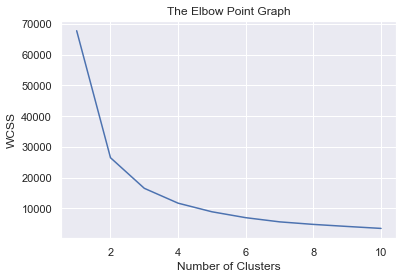

In [72]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [73]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 0 1 ... 0 2 0]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

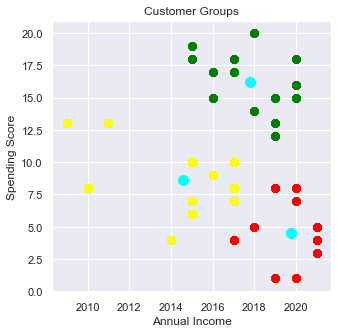

In [75]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
#plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
#plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()